In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
pip install transformers


     ---------------------------------------- 0.0/44.4 kB ? eta -:--:--
     ----------------- -------------------- 20.5/44.4 kB 320.0 kB/s eta 0:00:01
     ----------------------------------- -- 41.0/44.4 kB 326.8 kB/s eta 0:00:01
     -------------------------------------- 44.4/44.4 kB 310.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.7 MB 3.2 MB/s eta 0:00:04
   ---------------------------------------- 0.1/9.7 MB 1.2 MB/s eta 0:00:09
    --------------------------------------- 0.2/9.7 MB 2.0 MB/s eta 0:00:05
   - -------------------------------------- 0.3/9.7 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.7 MB 2.3 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.7 MB 3.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.7 MB 3.8 MB/s eta 0:00:03
   -------- ------------------------------- 2.0/9.7 MB 6.2 MB/s eta 0:00:02
   --------

In [ ]:
pip install tf-keras


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Makine Öğrenimi Modelleri
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Yapay Sinir Ağları ve Derin Öğrenme
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, GRU, Conv1D, GlobalMaxPooling1D

# Transformer ve BERT
from transformers import BertTokenizer, TFBertForSequenceClassification


In [5]:
# Veri setini yükleyin
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nlp final /dataset.csv')

# İlk birkaç satırı inceleyin
df.head()


,category,text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...


In [ ]:
df.info()
print("***************************")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  4900 non-null   object
 1   text      4900 non-null   object
dtypes: object(2)
memory usage: 76.7+ KB
***************************
category    0
text        0
dtype: int64


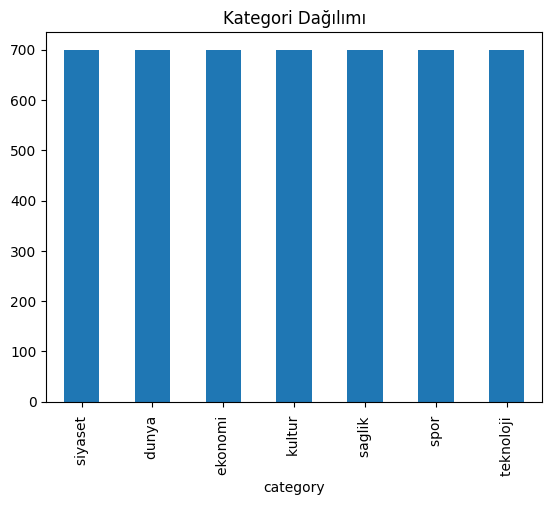

In [ ]:
df['category'].value_counts().plot(kind='bar', title='Kategori Dağılımı')
plt.show()



In [7]:
import nltk
nltk.download('all')  # Tüm NLTK veri setlerini indirir


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [8]:
# Gerekli kütüphanelerin yüklenmesi
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string

# NLTK'nin gerekli modüllerini indiriyoruz
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Tokenizer, Lemmatizer ve Stopword listesi
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Veri ön işleme fonksiyonu
def preprocess_text(text):
    # Küçük harfe çevirme
    text = text.lower()
    # Noktalama işaretlerini kaldırma
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = word_tokenize(text)
    # Lemmatization ve Stopword'lerin kaldırılması
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Tokenleri birleştirerek metni yeniden oluşturma
    return ' '.join(tokens)

# Dataset'i yükleme
import pandas as pd

# Dataset'i okuyalım
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nlp final /dataset.csv")

# İşlenmiş metni yeni bir sütuna ekleyelim
df['processed_text'] = df['text'].apply(preprocess_text)

# İşlemi kontrol edelim
print(df[['text', 'processed_text']].head())
df.to_csv("ready_txt.csv", index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0   3 milyon ile ön seçim vaadi mhp nin 10 olağan...   
1   mesut_yılmaz yüce_divan da ceza alabilirdi pr...   
2   disko lar kaldırılıyor başbakan_yardımcısı ar...   
3   sarıgül anayasa_mahkemesi ne gidiyor mustafa_...   
4   erdoğan idamın bir haklılık sebebi var demek ...   

                                      processed_text  
0  3 milyon ile ön seçim vaadi mhp nin 10 olağan ...  
1  mesutyılmaz yücedivan da ceza alabilirdi prof ...  
2  disko lar kaldırılıyor başbakanyardımcısı arın...  
3  sarıgül anayasamahkemesi ne gidiyor mustafasar...  
4  erdoğan idamın bir haklılık sebebi var demek k...  


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nlp final /ready_txt.csv")


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# BoW Vektörizer
bow_vectorizer = CountVectorizer(max_features=5000)  # En sık kullanılan 5000 kelime
X_bow = bow_vectorizer.fit_transform(df['processed_text'])

# İlk 10 kelime özelliği
print("BoW Özellikleri:", bow_vectorizer.get_feature_names_out()[:10])
print("BoW Şekli:", X_bow.shape)


BoW Özellikleri: ['00' '000' '01' '03' '04' '05' '06' '07' '08' '09']
BoW Şekli: (4900, 5000)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vektörizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

# İlk 10 kelime özelliği
print("TF-IDF Özellikleri:", tfidf_vectorizer.get_feature_names_out()[:10])
print("TF-IDF Şekli:", X_tfidf.shape)


TF-IDF Özellikleri: ['00' '000' '01' '03' '04' '05' '06' '07' '08' '09']
TF-IDF Şekli: (4900, 5000)


In [11]:
from gensim.models import Word2Vec

# Tokenize edilmiş metinler için ön hazırlık
tokenized_text = [word_tokenize(text) for text in df['processed_text']]

# Word2Vec Modeli
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=2, workers=4)

# Örnek kelime vektörü
example_word = "data"
if example_word in word2vec_model.wv:
    print(f"'{example_word}' kelimesinin vektörü:", word2vec_model.wv[example_word])
else:
    print(f"'{example_word}' kelimesi modelde bulunamadı.")


'data' kelimesinin vektörü: [-0.02509541  0.01037037  0.01505564  0.05791695 -0.01900239 -0.07350044
  0.08577836  0.13889891 -0.06740322 -0.02499318 -0.02270421 -0.05517021
 -0.05811786  0.06585345 -0.04650948 -0.00645541  0.02217764 -0.04100437
  0.02821509 -0.09448171  0.03064861  0.02521081  0.04331251 -0.0211117
 -0.02890452 -0.03136577 -0.02382887 -0.00403926  0.0269728   0.04218205
  0.08141813  0.01490595  0.06120883 -0.0606703  -0.02427622  0.11320712
  0.04635878 -0.04709773 -0.0233951  -0.07064659  0.0902378  -0.13294889
 -0.04431246  0.00930324  0.02664297 -0.03523956 -0.09593079  0.00265821
  0.02025705  0.06975958  0.04513818 -0.10216407 -0.01119319 -0.00582059
 -0.05270745  0.06932382  0.00523797 -0.02737628 -0.0105514   0.02014183
  0.01949545  0.04268411 -0.02220224 -0.01004302 -0.01934458  0.05692543
 -0.00647376  0.0078147  -0.0402085   0.08993329 -0.02903527  0.01071531
  0.07262286 -0.02209155  0.06591351  0.01753351  0.0196511   0.01773381
  0.01138157 -0.00438151

In [ ]:
df.head()

,category,text,processed_text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...,3 milyon ile ön seçim vaadi mhp nin 10 olağan ...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...,mesutyılmaz yücedivan da ceza alabilirdi prof ...
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...,disko lar kaldırılıyor başbakanyardımcısı arın...
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...,sarıgül anayasamahkemesi ne gidiyor mustafasar...
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...,erdoğan idamın bir haklılık sebebi var demek k...


## Traditional Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Özellikler ve hedef değişken
X = X_tfidf  # TF-IDF özelliklerini kullanıyoruz
y = df['category']  # Hedef sütun

# Train-Test ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)

def evaluate_model(y_test, y_pred, y_proba, model_name, label_encoder):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_proba, multi_class="ovr")

    print(f"--- {model_name} Performance ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()



--- Random Forest Performance ---
Accuracy: 0.8561
Precision: 0.8573
Recall: 0.8561
F1-Score: 0.8560
AUC: 0.9812


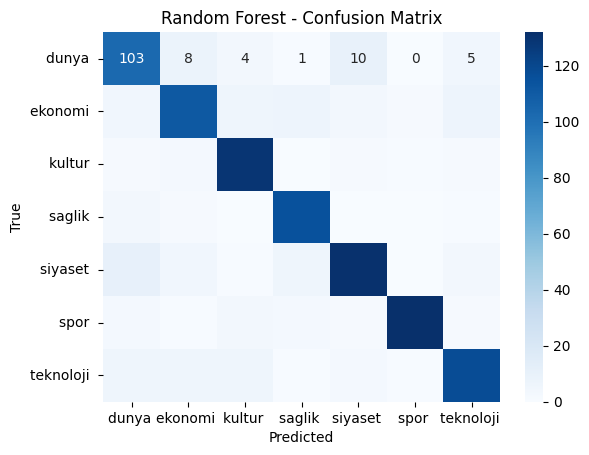

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Tahminler
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)

# Performans
evaluate_model(y_test, y_pred_rf, y_proba_rf, "Random Forest", label_encoder)


--- XGBoost Performance ---
Accuracy: 0.8571
Precision: 0.8585
Recall: 0.8571
F1-Score: 0.8572
AUC: 0.9779


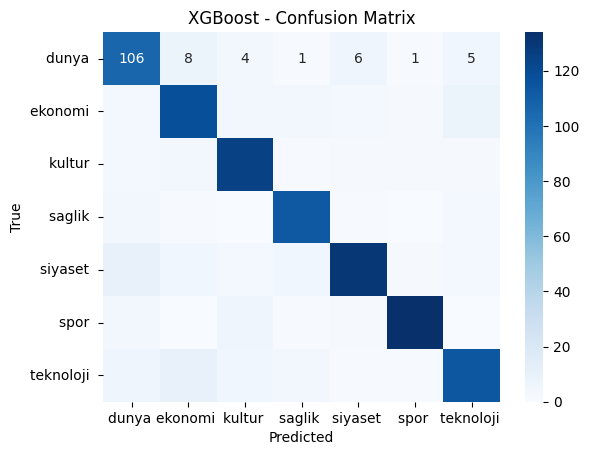

In [ ]:
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Hedef değişkeni encode etme
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['category'])

# Train-Test ayırma
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)


# Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Tahminler
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)

# Performans
evaluate_model(y_test, y_pred_xgb, y_proba_xgb, "XGBoost", label_encoder)




In [12]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Hedef değişkeni encode etme
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['category'])

# Train-Test ayırma
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130155
[LightGBM] [Info] Number of data points in the train set: 3920, number of used features: 4482
[LightGBM] [Info] Start training from score -1.929966
[LightGBM] [Info] Start training from score -1.949488
[LightGBM] [Info] Start training from score -1.944126
[LightGBM] [Info] Start training from score -1.914273
[LightGBM] [Info] Start training from score -1.978581
[LightGBM] [Info] Start training from score -1.958489
[LightGBM] [Info] Start training from score -1.947697
--- LightGBM Performance ---
Accuracy: 0.8806
Precision: 0.8832
Recall: 0.8806
F1-Score: 0.8811
AUC: 0.9848


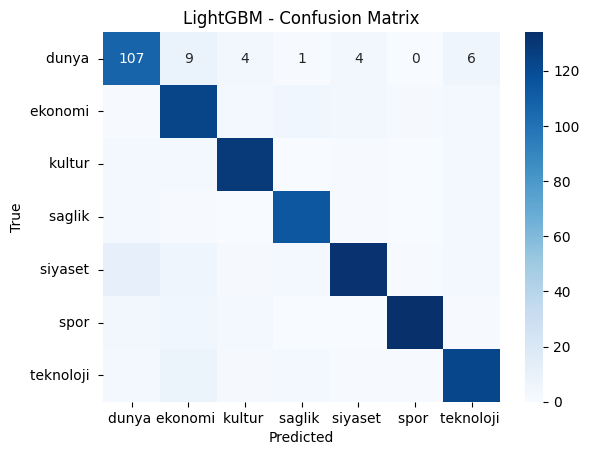

In [ ]:
from lightgbm import LGBMClassifier

# Model
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Tahminler
y_pred_lgb = lgb_model.predict(X_test)
y_proba_lgb = lgb_model.predict_proba(X_test)

# Performans
evaluate_model(y_test, y_pred_lgb, y_proba_lgb, "LightGBM", label_encoder)

add_to_results("LightGBM", y_test, y_pred_lgb, y_proba_lgb)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Tahminler
y_proba_ann = ann_model.predict(X_test)
y_pred_ann = y_proba_ann.argmax(axis=1)

# Performans



Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5354 - loss: 1.6309
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9498 - loss: 0.2284
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9915 - loss: 0.0511
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9993 - loss: 0.0175
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9989 - loss: 0.0104
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9994 - loss: 0.0061
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9996 - loss: 0.0044
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9990 - loss: 0.0057
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9995 - loss: 0.0026
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9998 - loss: 0.0021
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
# Tabloda her değeri 4 ondalık basamakla göster
pd.options.display.float_format = "{:.4f}".format

results_df.to_csv("model_performance_results.csv", index=False)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Random Forest,0.8561,0.8573,0.8561,0.8560,0.9812
1,XGBoost,0.8571,0.8585,0.8571,0.8572,0.9779
2,LightGBM,0.8806,0.8832,0.8806,0.8811,0.9848
3,ANN,0.9092,0.9103,0.9092,0.9093,0.9912


## Karmaşık Modeller

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout, GlobalMaxPooling1D

# Modelin yapısını oluşturuyoruz
model = Sequential()

# Word2Vec gömülüleri veya rastgele başlatılan gömülüleri ekliyoruz
embedding_layer = Embedding(input_dim=len(bow_vectorizer.get_feature_names_out()),
                            output_dim=50,  # Gömülü boyutunu da azaltıyoruz
                            input_length=X_bow.shape[1])
model.add(embedding_layer)

# CNN Katmanı
model.add(Conv1D(64, 3, activation='relu'))  # Daha az filtre ve daha küçük kernel boyutu
model.add(MaxPooling1D(pool_size=2))

# BiLSTM Katmanı
model.add(Bidirectional(LSTM(64, return_sequences=False)))  # Daha az nöron ve tek yönlü çıktı

# Fully Connected (Dense) Katmanı
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout oranını koruyoruz

# Çıkış Katmanı
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Modeli derliyoruz
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modeli eğitiyoruz
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


c:\Users\Baki Akgun\New Folder\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 346s 5s/step - accuracy: 0.1429 - loss: 1.9470 - val_accuracy: 0.1612 - val_loss: 1.9450
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 354s 6s/step - accuracy: 0.1292 - loss: 1.9472 - val_accuracy: 0.1418 - val_loss: 1.9469
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 346s 6s/step - accuracy: 0.1364 - loss: 1.9461 - val_accuracy: 0.1245 - val_loss: 1.9482
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 338s 5s/step - accuracy: 0.1433 - loss: 1.9459 - val_accuracy: 0.1245 - val_loss: 1.9470
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 335s 5s/step - accuracy: 0.1465 - loss: 1.9455 - val_accuracy: 0.1245 - val_loss: 1.9470
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 355s 6s/step - accuracy: 0.1536 - loss: 1.9462 - val_accuracy: 0.1245 - val_loss: 1.9472
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 393s 6s/step - accuracy: 0.1270 - loss: 1.9465 - val_accuracy: 0.1245 - val_loss: 1.9466
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 349s 6s/step - accuracy: 0.1515 - loss: 1.9458 - val_accuracy: 0.1245 - v

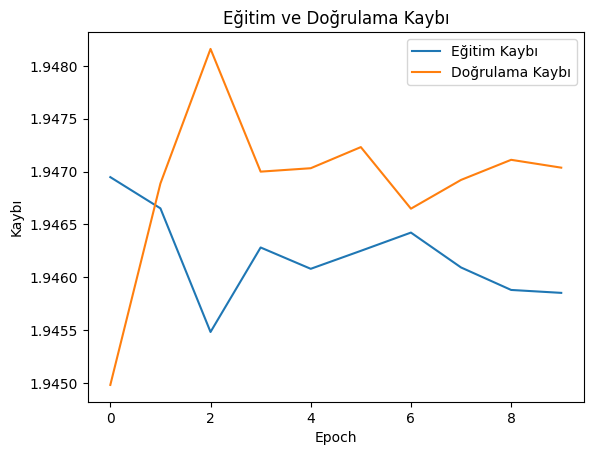

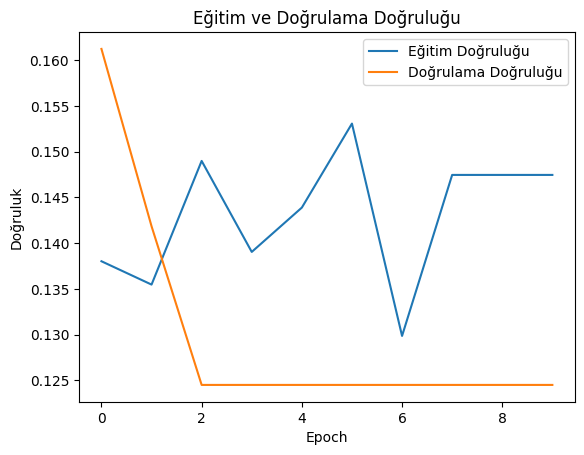

Eğitim Kaybı: 1.9459
Doğrulama Kaybı: 1.9470
Eğitim Doğruluğu: 0.1474
Doğrulama Doğruluğu: 0.1245


In [ ]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kaybını çizme
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluğunu çizme
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Modelin doğruluk ve kayıp metriklerini yazdırma
print(f"Eğitim Kaybı: {history.history['loss'][-1]:.4f}")
print(f"Doğrulama Kaybı: {history.history['val_loss'][-1]:.4f}")
print(f"Eğitim Doğruluğu: {history.history['accuracy'][-1]:.4f}")
print(f"Doğrulama Doğruluğu: {history.history['val_accuracy'][-1]:.4f}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, GRU, Dense, Dropout, GlobalMaxPooling1D, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Modelin yapısını oluşturuyoruz
model = Sequential()

# Word2Vec gömülüleri veya rastgele başlatılan gömülüleri ekleyelim
embedding_layer = Embedding(input_dim=len(bow_vectorizer.get_feature_names_out()),
                            output_dim=100,
                            input_length=X_bow.shape[1])
model.add(embedding_layer)

# CNN Katmanları
model.add(Conv1D(256, 5, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))  # Overfitting'i engellemek için dropout ekledik

# LSTM Katmanları
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.5))  # Overfitting'i engellemek için dropout ekledik

# BiLSTM Katmanı
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.5))  # Dropout ekliyoruz

# GRU Katmanı
model.add(GRU(256, return_sequences=True))
model.add(Dropout(0.5))  # Dropout ekliyoruz

# Global Max Pooling Katmanı
model.add(GlobalMaxPooling1D())

# Fully Connected (Dense) Katmanları
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout ekliyoruz

# BatchNormalization Katmanı
model.add(BatchNormalization())

# Dense Katmanı
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Çıkış Katmanı
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Öğrenme oranını ayarlayarak optimizer'ı değiştirebiliriz
optimizer = Adam(learning_rate=0.0005)  # Öğrenme oranını düşürdük

# Modeli derleyelim
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Modeli eğitelim
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Eğitim sürecini görselleştirme
import matplotlib.pyplot as plt

# Loss görselleştirmesi
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy görselleştirmesi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 22s 146ms/step - accuracy: 0.1367 - loss: 1.9474 - val_accuracy: 0.1337 - val_loss: 1.9468
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.1394 - loss: 1.9464 - val_accuracy: 0.1245 - val_loss: 1.9471
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - accuracy: 0.1436 - loss: 1.9462 - val_accuracy: 0.1245 - val_loss: 1.9471
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.1354 - loss: 1.9463 - val_accuracy: 0.1245 - val_loss: 1.9476
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.1336734693877551
Precision: 0.0178685964181591
Recall: 0.1336734693877551
F1-Score: 0.031523356417274384


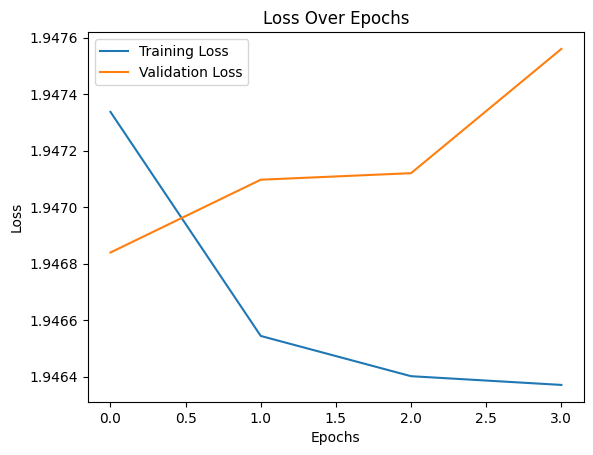

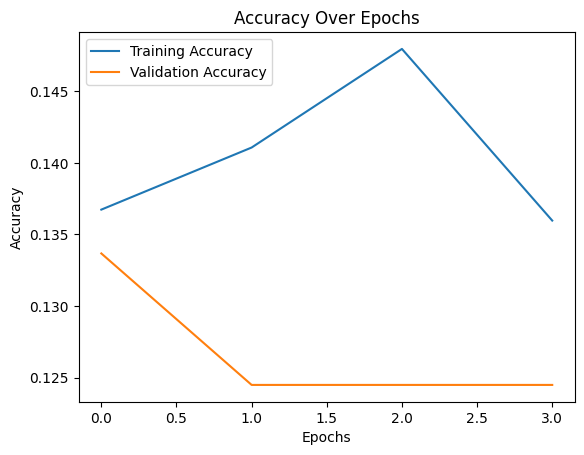

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, GlobalMaxPooling1D
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

# Etiketleri LabelEncoder ile integer formatına dönüştürme
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Etiketleri integer formata dönüştür
y_test = label_encoder.transform(y_test)


# Modelin yapısını oluşturuyoruz
model = Sequential()

# Embedding Katmanı
embedding_layer = Embedding(input_dim=len(bow_vectorizer.get_feature_names_out()),
                            output_dim=50,  # Daha küçük bir boyut
                            input_length=X_bow.shape[1])
model.add(embedding_layer)

# CNN Katmanı
model.add(Conv1D(128, 5, activation='relu'))  # Daha az filtre
model.add(MaxPooling1D(pool_size=2))

# LSTM Katmanı
model.add(LSTM(64, return_sequences=False))  # 2D çıktı (return_sequences=False)

# Dense Katmanı
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Overfitting'i önlemek için

# Çıkış Katmanı
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Sınıf sayısı kadar çıkış

# Modeli derleme
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Early Stopping ile eğitimi izleme
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Modeli eğitme
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Performans metriklerini hesaplama
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Tahminler
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Metrikleri hesaplama
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Eğitim ve doğrulama kaybını görselleştirme
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 30s 301ms/step - accuracy: 0.1258 - loss: 2.1424 - val_accuracy: 0.1337 - val_loss: 1.9472
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 268ms/step - accuracy: 0.1512 - loss: 1.9518 - val_accuracy: 0.1245 - val_loss: 1.9477
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 270ms/step - accuracy: 0.1509 - loss: 1.9476 - val_accuracy: 0.1337 - val_loss: 1.9469
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 267ms/step - accuracy: 0.1389 - loss: 1.9465 - val_accuracy: 0.1245 - val_loss: 1.9475
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 265ms/step - accuracy: 0.1534 - loss: 1.9460 - val_accuracy: 0.1245 - val_loss: 1.9480
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.1547 - loss: 1.9459 - val_accuracy: 0.1245 - val_loss: 1.9484
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step
Accuracy: 0.1336734693877551
Precision: 0.0178685964181591
Recall: 0.1336734693877551
F1-Score: 0.031523356417274384


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


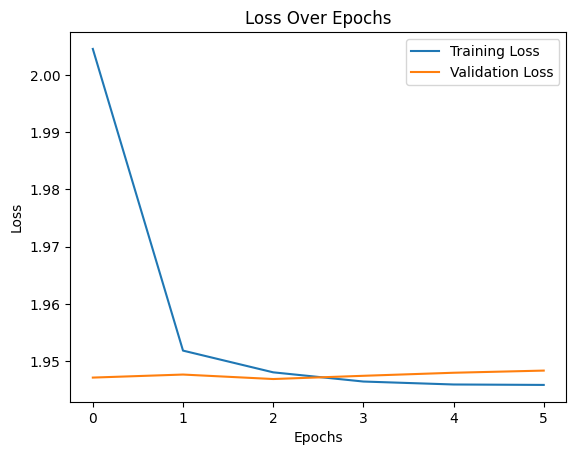

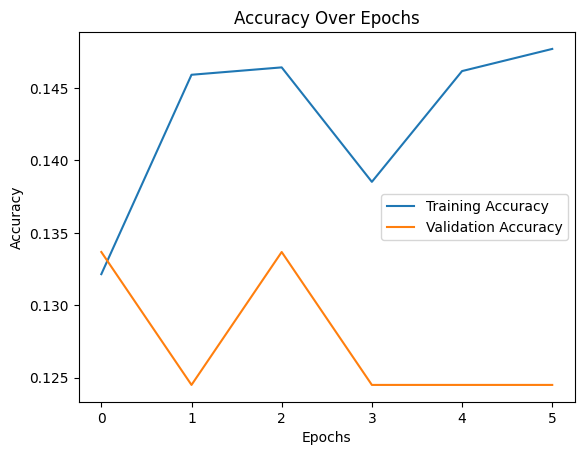

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, GRU, Bidirectional, Dense, Dropout, GlobalMaxPooling1D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Etiketleri LabelEncoder ile integer formatına dönüştürme
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Etiketleri integer formata dönüştür
y_test = label_encoder.transform(y_test)

# Modelin yapısını oluşturuyoruz
model = Sequential()

# Embedding Katmanı
embedding_layer = Embedding(input_dim=len(bow_vectorizer.get_feature_names_out()),
                            output_dim=100,  # Daha büyük bir boyut, daha fazla bilgi
                            input_length=X_bow.shape[1])
model.add(embedding_layer)

# İlk CNN Katmanı
model.add(Conv1D(128, 3, activation='relu', padding='same'))  # padding='same' ile boyutları koruyoruz
model.add(MaxPooling1D(pool_size=2))  # MaxPooling ile öznitelik sayısını azaltıyoruz
model.add(Dropout(0.5))  # Aşırı öğrenmeyi engellemek için dropout ekledik

# İkinci CNN Katmanı
model.add(Conv1D(64, 3, activation='relu', padding='same'))  # Daha küçük filtre sayısı
model.add(MaxPooling1D(pool_size=2))  # İkinci pooling katmanı
model.add(Dropout(0.5))  # Aşırı öğrenmeyi engellemek için ikinci dropout ekledik

# BiLSTM Katmanı (Bidirectional LSTM)
model.add(Bidirectional(LSTM(128, return_sequences=True)))  # return_sequences=True ile her zaman çıktıları döndürüyoruz
model.add(Dropout(0.5))  # LSTM katmanına dropout ekledik
model.add(BatchNormalization())  # Batch normalization ile modelin öğrenmesini stabilize ediyoruz

# GRU Katmanı
model.add(GRU(128, return_sequences=True))  # GRU katmanını da ekledik, return_sequences=True
model.add(Dropout(0.5))  # GRU katmanına da dropout ekledik

# GlobalMaxPooling1D Katmanı
model.add(GlobalMaxPooling1D())  # Geriye sadece en büyük özelliği alıyoruz

# Dense Katmanı
model.add(Dense(128, activation='relu'))  # 128 nöronlu bir dense katmanı ekledik
model.add(Dropout(0.5))  # Dense katmanına da dropout ekledik

# Çıkış Katmanı
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Sınıf sayısı kadar çıkış katmanı

# Modeli derleme
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Early Stopping ile eğitimi izleme
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Modeli eğitme
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Performans metriklerini hesaplama
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Metrikleri hesaplama
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Eğitim ve doğrulama kaybını görselleştirme
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Bert Model

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import create_optimizer
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Örnek veri
# df = pd.read_csv("your_dataset.csv")  # Verinizi buraya yükleyin
# df['processed_text'] ve df['category'] ile çalışıyorsunuz

# Veriyi train-test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'], df['category'], test_size=0.2, random_state=42
)

# Kategorik etiketleri sayısal değerlere dönüştürme
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Tokenizer tanımlama
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

def encode_texts(texts):
    return tokenizer(
        texts.tolist(),
        padding=True,
        truncation=True,
        max_length=256,
        return_tensors='tf'
    )

# Metinleri tokenize etme
train_encodings = encode_texts(X_train)
test_encodings = encode_texts(X_test)

# Etiketleri TensorFlow tensörlerine dönüştürme
train_labels = tf.convert_to_tensor(y_train, dtype=tf.int32)
test_labels = tf.convert_to_tensor(y_test, dtype=tf.int32)

# Modeli yükleme
model = TFBertForSequenceClassification.from_pretrained(
    'bert-base-multilingual-cased',
    num_labels=len(label_encoder.classes_)
)

# Optimizer tanımlama (Transformers'da önerilen yöntem)
num_train_steps = len(X_train) // 8 * 3  # batch_size = 8 ve epochs = 3
optimizer, schedule = create_optimizer(
    init_lr=5e-5,
    num_warmup_steps=0,
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01
)

# Modeli derleme
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Modeli eğitme
history = model.fit(
    x={
        'input_ids': train_encodings['input_ids'],
        'attention_mask': train_encodings['attention_mask']
    },
    y=train_labels,
    epochs=3,
    batch_size=8,
    validation_data=(
        {
            'input_ids': test_encodings['input_ids'],
            'attention_mask': test_encodings['attention_mask']
        },
        test_labels
    )
)

# Modeli değerlendirme
predictions = model.predict(
    {
        'input_ids': test_encodings['input_ids'],
        'attention_mask': test_encodings['attention_mask']
    }
)
pred_labels = tf.argmax(predictions.logits, axis=1).numpy()

# Tahminleri geri dönüştürme
pred_labels = label_encoder.inverse_transform(pred_labels)

accuracy = accuracy_score(label_encoder.inverse_transform(y_test), pred_labels)
print(f'BERT Accuracy: {accuracy:.4f}')


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
490/490 [==============================] - 288s 565ms/step - loss: 0.8871 - accuracy: 0.7276 - val_loss: 0.5716 - val_accuracy: 0.8367
Epoch 2/3
490/490 [==============================] - 273s 557ms/step - loss: 0.4623 - accuracy: 0.8719 - val_loss: 0.4030 - val_accuracy: 0.8714
Epoch 3/3
31/31 [==============================] - 21s 576ms/step
BERT Accuracy: 0.8939


Classification Report:
              precision    recall  f1-score   support

      dunya        0.89      0.79      0.84       131
    ekonomi        0.87      0.84      0.85       142
     kultur        0.94      0.95      0.94       139
     saglik        0.89      0.95      0.92       122
    siyaset        0.84      0.86      0.85       158
       spor        0.97      0.97      0.97       147
  teknoloji        0.89      0.92      0.91       141

    accuracy                           0.90       980
   macro avg       0.90      0.90      0.90       980
weighted avg       0.90      0.90      0.90       980



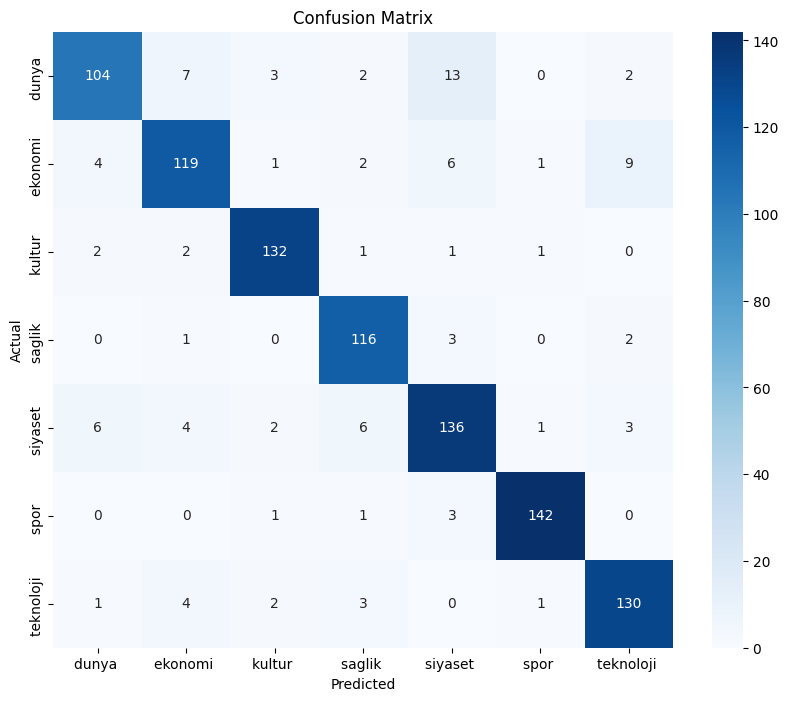

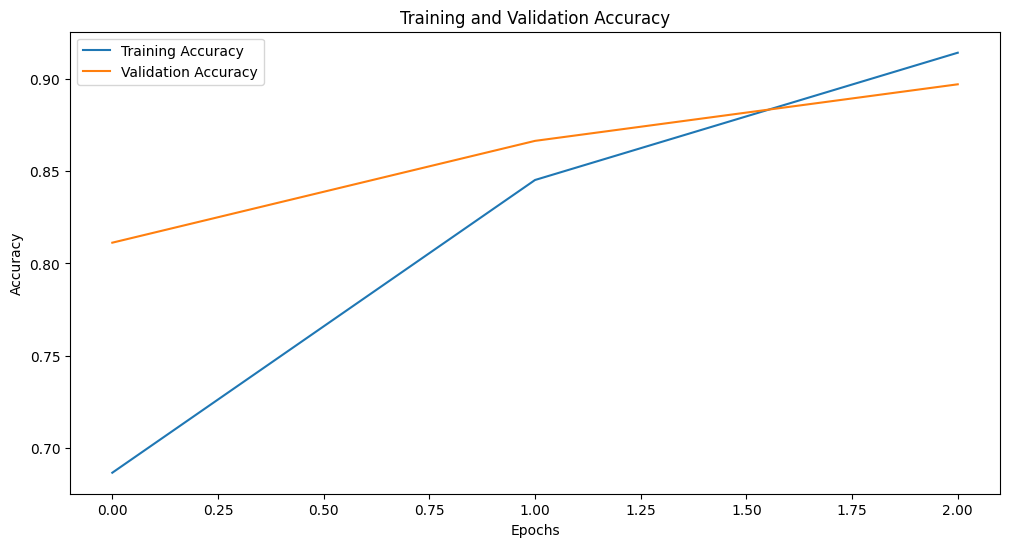

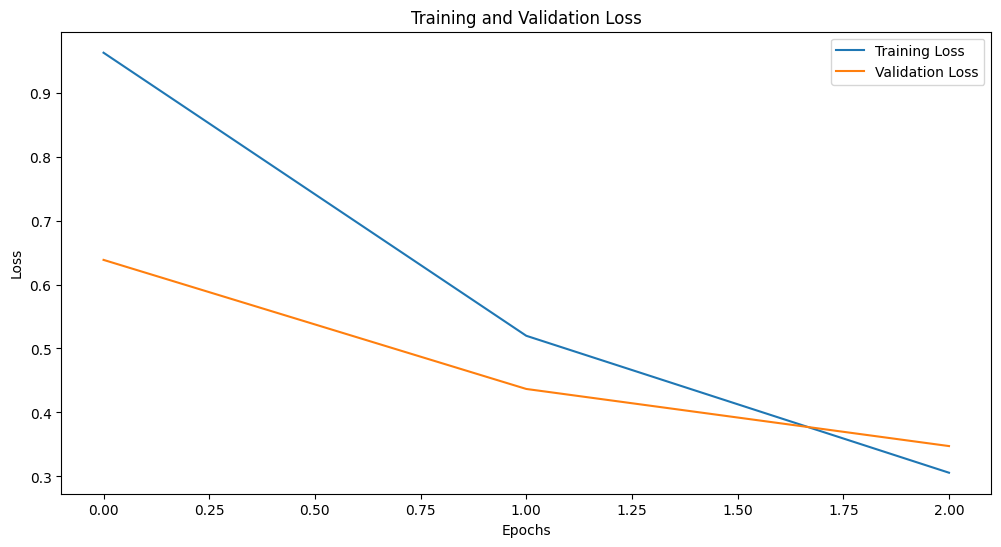

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Performans raporu
print("Classification Report:")
print(classification_report(label_encoder.inverse_transform(y_test), pred_labels))

# Karışıklık matrisi
cm = confusion_matrix(label_encoder.inverse_transform(y_test), pred_labels, labels=label_encoder.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Eğitim ve doğrulama doğruluk grafiği
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Eğitim ve doğrulama kayıp grafiği
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Sınıflandırma raporunu oluşturma
class_report = classification_report(
    label_encoder.inverse_transform(y_test),
    pred_labels,
    output_dict=True
)

# DataFrame'e dönüştürme
report_df = pd.DataFrame(class_report).transpose()

# Accuracy ekleme
accuracy = accuracy_score(label_encoder.inverse_transform(y_test), pred_labels)
report_df.loc['accuracy'] = [accuracy, '', '', '']

# ROC AUC ekleme (Eğer ROC AUC uygunsa)
if len(label_encoder.classes_) == 2:  # İkili sınıflandırma
    y_test_bin = label_encoder.transform(y_test)
    pred_probs = tf.nn.softmax(predictions.logits, axis=1).numpy()[:, 1]
    roc_auc = roc_auc_score(y_test_bin, pred_probs)
else:  # Çok sınıflı
    y_test_bin = tf.keras.utils.to_categorical(y_test, num_classes=len(label_encoder.classes_))
    pred_probs = tf.nn.softmax(predictions.logits, axis=1).numpy()
    roc_auc = roc_auc_score(y_test_bin, pred_probs, average="macro", multi_class="ovr")

report_df.loc['roc_auc'] = [roc_auc, '', '', '']

# Tablonun sadece genel özet kısmını seçme
summary_df = report_df.loc[['macro avg', 'accuracy', 'roc_auc']]
summary_df = summary_df.round(4)

# Tüm metrikleri tek satırda birleştirme
single_row_summary = pd.DataFrame({
    'accuracy': [summary_df.loc['accuracy', 'precision']],  # Accuracy 'precision' sütununda tutuldu
    'precision': [summary_df.loc['macro avg', 'precision']],
    'recall': [summary_df.loc['macro avg', 'recall']],
    'f1_score': [summary_df.loc['macro avg', 'f1-score']],
    'roc_auc': [summary_df.loc['roc_auc', 'precision']]     # ROC AUC 'precision' sütununda tutuldu
}).round(4)

# Görselleştirme
single_row_summary

# CSV dosyasına kaydetme
file_path = "/content/drive/MyDrive/Colab Notebooks/nlp final /bert-no-fine-tuning.csv"
single_row_summary.to_csv(file_path, index=False)

# Çıktıyı görüntüleme
single_row_summary


<ipython-input-39-9a841a050761>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  report_df.loc['accuracy'] = [accuracy, '', '', '']
<ipython-input-39-9a841a050761>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  report_df.loc['accuracy'] = [accuracy, '', '', '']
<ipython-input-39-9a841a050761>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  report_df.loc['accuracy'] = [accuracy, '', '', '']


,accuracy,precision,recall,f1_score,roc_auc
0,0.8939,0.8942,0.8956,0.8937,0.9867


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import create_optimizer
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Veriyi yükleme (örnek veri, kendi verinizle değiştirmeyi unutmayın)
# df = pd.read_csv("your_dataset.csv")  # Verinizi buraya yükleyin
# df['processed_text'] ve df['category'] ile çalışıyorsunuz

# Veriyi train-test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'], df['category'], test_size=0.2, random_state=42
)

# Kategorik etiketleri sayısal değerlere dönüştürme
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Tokenizer tanımlama
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

def encode_texts(texts):
    return tokenizer(
        texts.tolist(),
        padding=True,
        truncation=True,
        max_length=256,
        return_tensors='tf'
    )

# Metinleri tokenize etme
train_encodings = encode_texts(X_train)
test_encodings = encode_texts(X_test)

# Etiketleri TensorFlow tensörlerine dönüştürme
train_labels = tf.convert_to_tensor(y_train, dtype=tf.int32)
test_labels = tf.convert_to_tensor(y_test, dtype=tf.int32)

# Modeli yükleme (fine-tuning için)
model = TFBertForSequenceClassification.from_pretrained(
    'bert-base-multilingual-cased',
    num_labels=len(label_encoder.classes_),
    output_attentions=False,  # Attentions çıkarımı yapılmasını istemiyorsanız
    output_hidden_states=False  # Hidden state çıkarımı yapılmasını istemiyorsanız
)

# Optimizer tanımlama (Learning rate ve batch size gibi hiperparametreler için tuning)
num_train_steps = len(X_train) // 8 * 3  # batch_size = 8 ve epochs = 3
optimizer, schedule = create_optimizer(
    init_lr=2e-5,  # Fine-tuning için genellikle daha düşük learning rate kullanılır
    num_warmup_steps=0,
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01
)

# Modeli derleme
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Fine-tuning işlemi
history = model.fit(
    x={
        'input_ids': train_encodings['input_ids'],
        'attention_mask': train_encodings['attention_mask']
    },
    y=train_labels,
    epochs=3,
    batch_size=8,
    validation_data=(
        {
            'input_ids': test_encodings['input_ids'],
            'attention_mask': test_encodings['attention_mask']
        },
        test_labels
    )
)

# Modeli değerlendirme
predictions = model.predict(
    {
        'input_ids': test_encodings['input_ids'],
        'attention_mask': test_encodings['attention_mask']
    }
)
pred_labels = tf.argmax(predictions.logits, axis=1).numpy()

# Tahminleri geri dönüştürme
pred_labels = label_encoder.inverse_transform(pred_labels)

accuracy = accuracy_score(label_encoder.inverse_transform(y_test), pred_labels)
print(f'BERT Fine-tuned Accuracy: {accuracy:.4f}')


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
490/490 [==============================] - 289s 563ms/step - loss: 0.7665 - accuracy: 0.7663 - val_loss: 0.4378 - val_accuracy: 0.8735
Epoch 2/3
490/490 [==============================] - 273s 556ms/step - loss: 0.3253 - accuracy: 0.9125 - val_loss: 0.3238 - val_accuracy: 0.8980
Epoch 3/3
31/31 [==============================] - 21s 578ms/step
BERT Fine-tuned Accuracy: 0.9122


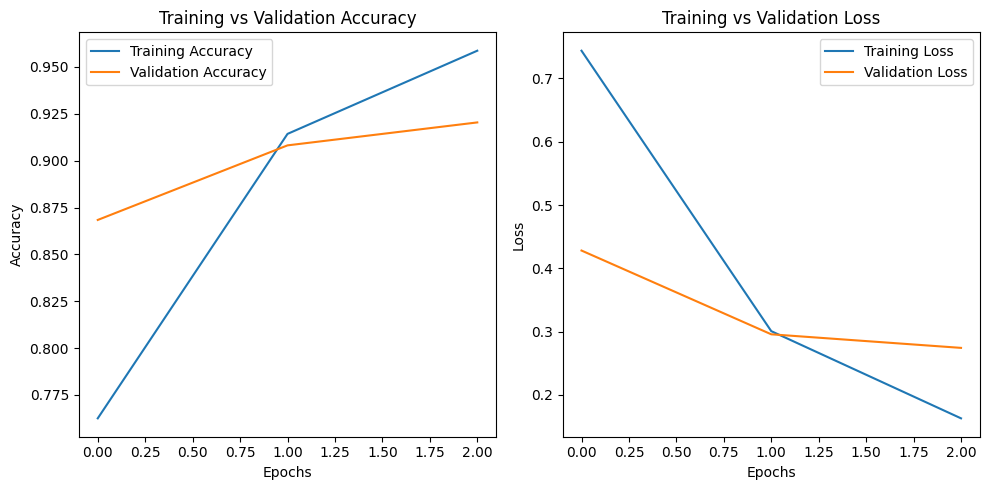

BERT Fine-tuned Accuracy: 0.9204


In [ ]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğruluğu grafiği
plt.figure(figsize=(10, 5))

# Eğitim doğruluğu
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Eğitim ve doğrulama kaybı (loss) grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Grafik gösterimi
plt.tight_layout()
plt.show()

# Modelin test setindeki doğruluğunu yazdırma
accuracy = accuracy_score(label_encoder.inverse_transform(y_test), pred_labels)
print(f'BERT Fine-tuned Accuracy: {accuracy:.4f}')


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Sınıflandırma raporunu oluşturma
class_report = classification_report(
    label_encoder.inverse_transform(y_test),
    pred_labels,
    output_dict=True
)

# DataFrame'e dönüştürme
report_df = pd.DataFrame(class_report).transpose()

# Accuracy ekleme
accuracy = accuracy_score(label_encoder.inverse_transform(y_test), pred_labels)
report_df.loc['accuracy'] = [accuracy, '', '', '']

# ROC AUC ekleme (Eğer ROC AUC uygunsa)
if len(label_encoder.classes_) == 2:  # İkili sınıflandırma
    y_test_bin = label_encoder.transform(y_test)
    pred_probs = tf.nn.softmax(predictions.logits, axis=1).numpy()[:, 1]
    roc_auc = roc_auc_score(y_test_bin, pred_probs)
else:  # Çok sınıflı
    y_test_bin = tf.keras.utils.to_categorical(y_test, num_classes=len(label_encoder.classes_))
    pred_probs = tf.nn.softmax(predictions.logits, axis=1).numpy()
    roc_auc = roc_auc_score(y_test_bin, pred_probs, average="macro", multi_class="ovr")

report_df.loc['roc_auc'] = [roc_auc, '', '', '']

# Tablonun sadece genel özet kısmını seçme
summary_df = report_df.loc[['macro avg', 'accuracy', 'roc_auc']]
summary_df = summary_df.round(4)

# Tüm metrikleri tek satırda birleştirme
single_row_summary = pd.DataFrame({
    'accuracy': [summary_df.loc['accuracy', 'precision']],  # Accuracy 'precision' sütununda tutuldu
    'precision': [summary_df.loc['macro avg', 'precision']],
    'recall': [summary_df.loc['macro avg', 'recall']],
    'f1_score': [summary_df.loc['macro avg', 'f1-score']],
    'roc_auc': [summary_df.loc['roc_auc', 'precision']]     # ROC AUC 'precision' sütununda tutuldu
}).round(4)

# Görselleştirme
single_row_summary

# CSV dosyasına kaydetme
file_path = "/content/drive/MyDrive/Colab Notebooks/nlp final /bert1-fine-tuning.csv"
single_row_summary.to_csv(file_path, index=False)

# Çıktıyı görüntüleme
single_row_summary


<ipython-input-49-2a5dbccef9a8>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  report_df.loc['accuracy'] = [accuracy, '', '', '']
<ipython-input-49-2a5dbccef9a8>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  report_df.loc['accuracy'] = [accuracy, '', '', '']
<ipython-input-49-2a5dbccef9a8>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  report_df.loc['accuracy'] = [accuracy, '', '', '']


,accuracy,precision,recall,f1_score,roc_auc
0,0.9122,0.9127,0.914,0.9122,0.992


In [ ]:
import pandas as pd

# CSV dosyalarını yükleme
fine_tuning_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nlp final /bert1-fine-tuning.csv')
no_fine_tuning_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nlp final /bert-no-fine-tuning.csv')

# Her DataFrame'e yeni bir sütun ekleyerek model adlarını belirleme
fine_tuning_df['Model'] = 'Bert Model Fine Tuning'
no_fine_tuning_df['Model'] = 'Bert Model No Fine Tuning'

# İki DataFrame'i birleştirme
merged_df = pd.concat([fine_tuning_df, no_fine_tuning_df], axis=0, ignore_index=True)

# "Model" sütununu en başa almak
cols = ['Model'] + [col for col in merged_df.columns if col != 'Model']
merged_df = merged_df[cols]

# Sonuçları gösterme
merged_df


,Model,accuracy,precision,recall,f1_score,roc_auc
0,Bert Model Fine Tuning,0.9122,0.9127,0.9140,0.9122,0.9920
1,Bert Model No Fine Tuning,0.8939,0.8942,0.8956,0.8937,0.9867
